In [1]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import scipy.stats as stats

In [2]:
allergy = pd.read_excel('C:/Users/kesle/OneDrive/Desktop/food-allergy-analysis-Zenodo-final.xlsx')

#Viewing RACEFACTOR value counts

In [3]:
allergy['RACEFACTOR'].value_counts()

R0 - White                        183308
R1 - Black                         97795
R4 - Unknown                       40940
R2 - Asian or Pacific Islander      9152
R3 - Other                          2005
Name: RACEFACTOR, dtype: int64

#Will use 0 for White, 1 for Black, 2 for Asian or Pacific Islander, 3 for Other, 4 for Unknown.

In [4]:
def RACEFACTOR_recode (series):
    if series == "R0 - White":
        return 0
    if series == "R1 - Black":
        return 1
    if series == "R2 - Asian or Pacific Islander":
        return 2
    if series == "R3 - Other":
        return 3
    if series == "R4 - Unknown":
        return 4

In [5]:
allergy['RACEFACTOR']=allergy['RACEFACTOR'].apply(RACEFACTOR_recode)

In [6]:
allergy.head()

,SUBJECTID,BIRTHYEAR,GENDERFACTOR,RACEFACTOR,ETHNICITYFACTOR,AGESTARTYEARS,SHELLFISHALGSTART,FISHALGSTART,MILKALGSTART,SOYALGSTART,EGGALGSTART,WHEATALGSTART,PEANUTALGSTART,SESAMEALGSTART,TREENUTALGSTART,ATOPICDERMSTART,ALLERGICRHINITISSTART,ASTHMASTART,FIRSTASTHMARX,NUMASTHMARX
0,1,2006,S1 - Female,1,E0 - Non-Hispanic,0.093087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,S1 - Female,0,E0 - Non-Hispanic,12.232717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,2.0
2,3,2006,S0 - Male,0,E1 - Hispanic,0.010951,NaN,NaN,1.002053,NaN,NaN,NaN,NaN,NaN,NaN,4.884326,3.917864,5.127995,1.404517,4.0
3,4,2004,S0 - Male,4,E1 - Hispanic,2.398357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,S1 - Female,1,E0 - Non-Hispanic,0.013689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Success. Now onto GENDERFACTOR

In [7]:
allergy['GENDERFACTOR'].value_counts()

S0 - Male      169032
S1 - Female    164168
Name: GENDERFACTOR, dtype: int64

#Will use 0 for Male, 1 for Female.

In [8]:
def GENDERFACTOR_recode (series):
    if series == "S0 - Male":
        return 0
    if series == "S1 - Female":
        return 1
allergy['GENDERFACTOR']=allergy['GENDERFACTOR'].apply(GENDERFACTOR_recode)

In [9]:
allergy.head()

,SUBJECTID,BIRTHYEAR,GENDERFACTOR,RACEFACTOR,ETHNICITYFACTOR,AGESTARTYEARS,SHELLFISHALGSTART,FISHALGSTART,MILKALGSTART,SOYALGSTART,EGGALGSTART,WHEATALGSTART,PEANUTALGSTART,SESAMEALGSTART,TREENUTALGSTART,ATOPICDERMSTART,ALLERGICRHINITISSTART,ASTHMASTART,FIRSTASTHMARX,NUMASTHMARX
0,1,2006,1,1,E0 - Non-Hispanic,0.093087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,1,0,E0 - Non-Hispanic,12.232717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,2.0
2,3,2006,0,0,E1 - Hispanic,0.010951,NaN,NaN,1.002053,NaN,NaN,NaN,NaN,NaN,NaN,4.884326,3.917864,5.127995,1.404517,4.0
3,4,2004,0,4,E1 - Hispanic,2.398357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,1,1,E0 - Non-Hispanic,0.013689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Done. Now onto ETHNICITYFACTOR.

In [10]:
allergy['ETHNICITYFACTOR'].value_counts()

E0 - Non-Hispanic    317868
E1 - Hispanic         15332
Name: ETHNICITYFACTOR, dtype: int64

#Will use 0 for Non-Hispanic, 1 for Hispanic.

In [11]:
def ETHNICITYFACTOR_recode (series):
    if series == "E0 - Non-Hispanic":
        return 0
    if series == "E1 - Hispanic":
        return 1
allergy['ETHNICITYFACTOR']=allergy['ETHNICITYFACTOR'].apply(ETHNICITYFACTOR_recode)

In [12]:
allergy.head()

,SUBJECTID,BIRTHYEAR,GENDERFACTOR,RACEFACTOR,ETHNICITYFACTOR,AGESTARTYEARS,SHELLFISHALGSTART,FISHALGSTART,MILKALGSTART,SOYALGSTART,EGGALGSTART,WHEATALGSTART,PEANUTALGSTART,SESAMEALGSTART,TREENUTALGSTART,ATOPICDERMSTART,ALLERGICRHINITISSTART,ASTHMASTART,FIRSTASTHMARX,NUMASTHMARX
0,1,2006,1,1,0,0.093087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,1,0,0,12.232717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,2.0
2,3,2006,0,0,1,0.010951,NaN,NaN,1.002053,NaN,NaN,NaN,NaN,NaN,NaN,4.884326,3.917864,5.127995,1.404517,4.0
3,4,2004,0,4,1,2.398357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,1,1,0,0.013689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Filling NA with 0

In [13]:
allergy.fillna(0)

,SUBJECTID,BIRTHYEAR,GENDERFACTOR,RACEFACTOR,ETHNICITYFACTOR,AGESTARTYEARS,SHELLFISHALGSTART,FISHALGSTART,MILKALGSTART,SOYALGSTART,EGGALGSTART,WHEATALGSTART,PEANUTALGSTART,SESAMEALGSTART,TREENUTALGSTART,ATOPICDERMSTART,ALLERGICRHINITISSTART,ASTHMASTART,FIRSTASTHMARX,NUMASTHMARX
0,1,2006,1,1,0,0.093087,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,2,1994,1,0,0,12.232717,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,12.262834,2.0
2,3,2006,0,0,1,0.010951,0.0,0.0,1.002053,0.0,0.0,0.0,0.0,0.0,0.0,4.884326,3.917864,5.127995,1.404517,4.0
3,4,2004,0,4,1,2.398357,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,5,2006,1,1,0,0.013689,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333195,333196,2006,0,0,0,0.736482,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.736482,0.000000,5.426420,0.000000,0.0
333196,333197,2006,1,1,0,0.019165,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
333197,333198,2006,0,0,0,0.443532,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2.321697,2.321697,4.0
333198,333199,2006,0,3,0,0.013689,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0


#recode age into months / years

In [14]:
def Age (series):
    if series <= 2:
        return  2
    if series <= 4:
        return 4
    if series <= 6:
        return 6
    if series <= 10:
        return 10
    else:
        return 11 - 17
    
allergy["StartAge"] = allergy['AGESTARTYEARS'].apply(Age)   

In [15]:
allergy["StartAge"].value_counts()

 2     170240
 10     49896
-6      49809
 4      33216
 6      30039
Name: StartAge, dtype: int64

In [16]:
allergy['StartAge'].value_counts(normalize=True) * 100

 2     51.092437
 10    14.974790
-6     14.948679
 4      9.968788
 6      9.015306
Name: StartAge, dtype: float64

#This shows that 51.1% of subjects are between the age 2 or under. We're going to focus on this group for our data set and cut the rest out.

#Children 2 and under have the highest allergy diagnosis count. Will be focusing on that group for our analysis.

In [17]:
allergy['AGESTARTYEARS'].value_counts()

 0.010951     18201
 0.013689     17773
 0.016427     16645
 0.019165     15020
 0.008214      8735
              ...  
 17.180014        1
-0.095825         1
-0.235455         1
 17.341547        1
 17.524983        1
Name: AGESTARTYEARS, Length: 6480, dtype: int64

In [18]:
def AGESTARTYEARS_recode (series):
    if series <= 2:
        return  2
    
allergy["AGESTARTYEARS"] = allergy['AGESTARTYEARS'].apply(AGESTARTYEARS_recode)     
allergy["AGESTARTYEARS"].value_counts()

2.0    170240
Name: AGESTARTYEARS, dtype: int64

#now we are looking at the ages 2 and under. We can completely drop anything over the age of 2.

In [19]:
allergy = allergy[allergy.AGESTARTYEARS == 2]

In [20]:
allergy["AGESTARTYEARS"].value_counts()

2.0    170240
Name: AGESTARTYEARS, dtype: int64

In [21]:
allergy

,SUBJECTID,BIRTHYEAR,GENDERFACTOR,RACEFACTOR,ETHNICITYFACTOR,AGESTARTYEARS,SHELLFISHALGSTART,FISHALGSTART,MILKALGSTART,SOYALGSTART,...,WHEATALGSTART,PEANUTALGSTART,SESAMEALGSTART,TREENUTALGSTART,ATOPICDERMSTART,ALLERGICRHINITISSTART,ASTHMASTART,FIRSTASTHMARX,NUMASTHMARX,StartAge
0,1,2006,1,1,0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,3,2006,0,0,1,2.0,NaN,NaN,1.002053,NaN,...,NaN,NaN,NaN,NaN,4.884326,3.917864,5.127995,1.404517,4.0,2
4,5,2006,1,1,0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
5,6,2006,0,0,0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
6,7,2006,1,0,0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333195,333196,2006,0,0,0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.736482,NaN,5.426420,NaN,NaN,2
333196,333197,2006,1,1,0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
333197,333198,2006,0,0,0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.321697,2.321697,4.0,2
333198,333199,2006,0,3,0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


#Let's look at the percentages for RACE, GENDER, and ETHNICITY factors.

In [22]:
allergy['RACEFACTOR'].value_counts(normalize=True) * 100

0    54.179981
1    29.272791
4    12.498825
2     3.184915
3     0.863487
Name: RACEFACTOR, dtype: float64

#ok so 54.2% of subjects are white, 29.3% of subjects are black, 3.2% are of subjects asian/pacific islander, .9% of subjects are other, and 12.5% of subjects are unknown

In [23]:
allergy['GENDERFACTOR'].value_counts(normalize=True) * 100

0    51.410949
1    48.589051
Name: GENDERFACTOR, dtype: float64

#so 51.4% of the test subjects are male, 48.6% of subjects are female.

In [24]:
allergy['ETHNICITYFACTOR'].value_counts(normalize=True) * 100

0    94.494243
1     5.505757
Name: ETHNICITYFACTOR, dtype: float64

#that shows us that 94.5% of subjects identify as non-hispanic, while 5.5% identify as hispanic.

In [25]:
allergy = pd.read_excel('C:/Users/kesle/OneDrive/Desktop/Copy of food-allergy-analysis-Zenodo-3-9.xlsx')

Text(0, 0.5, 'Shellfish Allergy')

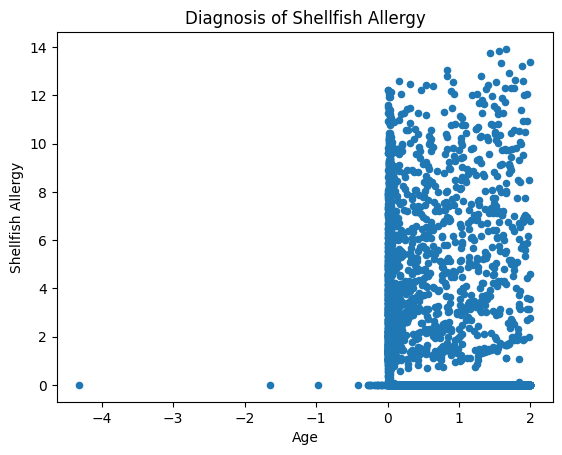

In [26]:
Plot=allergy.plot.scatter(x="AGESTARTYEARS", y="SHELLFISHALGSTART")
Plot.set_title("Diagnosis of Shellfish Allergy")
Plot.set_xlabel("Age")
Plot.set_ylabel("Shellfish Allergy")

In [27]:
allergy.SHELLFISHALGSTART.describe()

count    170240.000000
mean          0.062138
std           0.628451
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          13.930185
Name: SHELLFISHALGSTART, dtype: float64

#mean is 4.5 years old for diagnosis, standard deviation is 2.9. 2338 children between 0-2 have a shellfish allergy.

Text(0, 0.5, 'Fish Allergy')

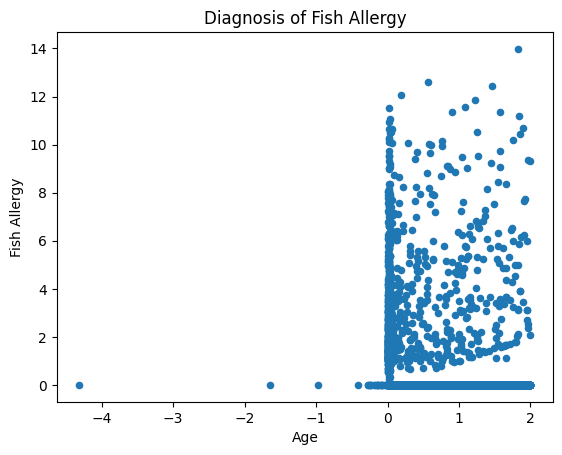

In [28]:
Plot=allergy.plot.scatter(x="AGESTARTYEARS", y="FISHALGSTART")
Plot.set_title("Diagnosis of Fish Allergy")
Plot.set_xlabel("Age")
Plot.set_ylabel("Fish Allergy")

In [29]:
allergy.FISHALGSTART.describe()

count    170240.000000
mean          0.020094
std           0.324056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          13.982204
Name: FISHALGSTART, dtype: float64

#mean is 3.4 years old for diagnosis, standard deviation is 2.5. 1000 children between 0-2 have a fish allergy.

Text(0, 0.5, 'Milk Allergy')

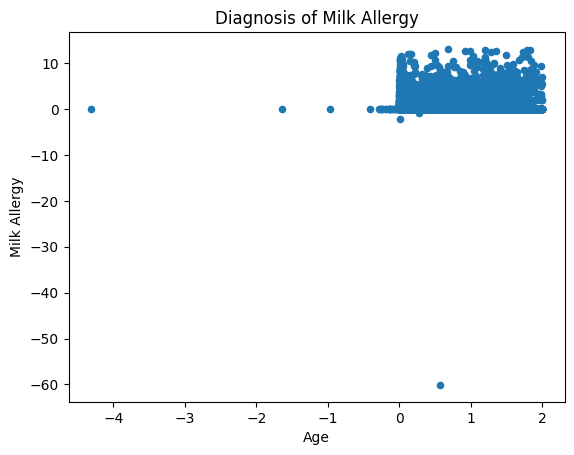

In [30]:
Plot=allergy.plot.scatter(x="AGESTARTYEARS", y="MILKALGSTART")
Plot.set_title("Diagnosis of Milk Allergy")
Plot.set_xlabel("Age")
Plot.set_ylabel("Milk Allergy")

In [31]:
allergy.MILKALGSTART.describe()

count    170240.000000
mean          0.056410
std           0.482217
min         -60.112252
25%           0.000000
50%           0.000000
75%           0.000000
max          13.127995
Name: MILKALGSTART, dtype: float64

#mean is 1.7 years old for diagnosis, standard deviation is 2. 5,647 children between 0-2 have a milk allergy.

Text(0, 0.5, 'Soy Allergy')

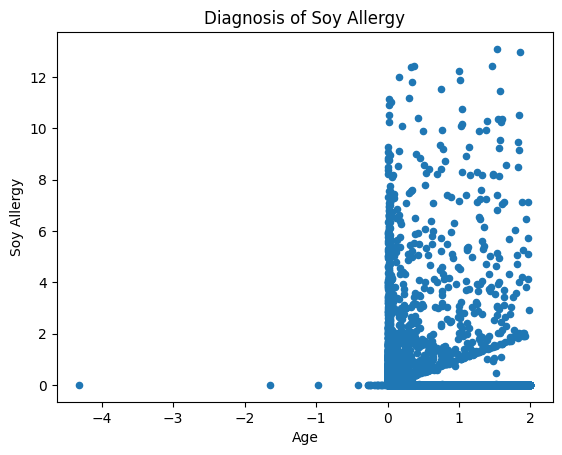

In [32]:
Plot=allergy.plot.scatter(x="AGESTARTYEARS", y="SOYALGSTART")
Plot.set_title("Diagnosis of Soy Allergy")
Plot.set_xlabel("Age")
Plot.set_ylabel("Soy Allergy")

In [33]:
allergy.SOYALGSTART.describe()

count    170240.000000
mean          0.022418
std           0.318074
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          13.095140
Name: SOYALGSTART, dtype: float64

#mean is 2 years old for diagnosis, standard deviation is 2.3. 1,829 children between 0-2 have a soy allergy.

Text(0, 0.5, 'Egg Allergy')

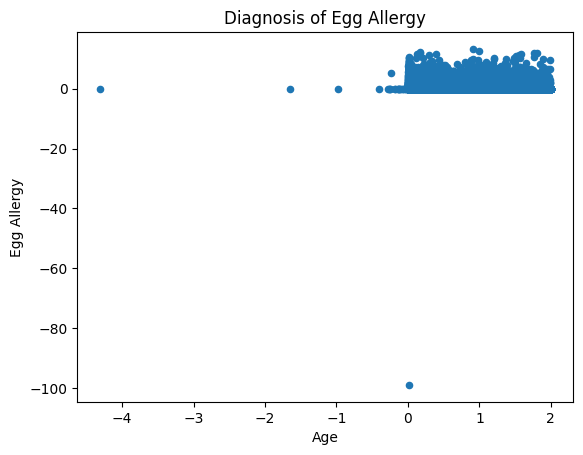

In [34]:
Plot=allergy.plot.scatter(x="AGESTARTYEARS", y="EGGALGSTART")
Plot.set_title("Diagnosis of Egg Allergy")
Plot.set_xlabel("Age")
Plot.set_ylabel("Egg Allergy")

In [35]:
allergy.EGGALGSTART.describe()

count    170240.000000
mean          0.055312
std           0.497567
min         -98.866530
25%           0.000000
50%           0.000000
75%           0.000000
max          13.218344
Name: EGGALGSTART, dtype: float64

#mean is 2 years old for diagnosis, standard deviation is 2.2. 4,719 children between 0-2 have an egg allergy.

Text(0, 0.5, 'Wheat Allergy')

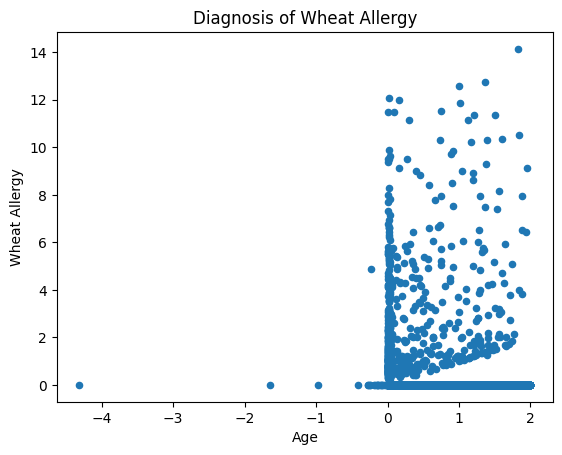

In [36]:
Plot=allergy.plot.scatter(x="AGESTARTYEARS", y="WHEATALGSTART")
Plot.set_title("Diagnosis of Wheat Allergy")
Plot.set_xlabel("Age")
Plot.set_ylabel("Wheat Allergy")

In [37]:
allergy.WHEATALGSTART.describe()

count    170240.000000
mean          0.011429
std           0.235558
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          14.138261
Name: WHEATALGSTART, dtype: float64

#mean is 2.4 years old for diagnosis, standard deviation is 2.43. 796 children between 0-2 have a wheat allergy.

Text(0, 0.5, 'Peanut Allergy')

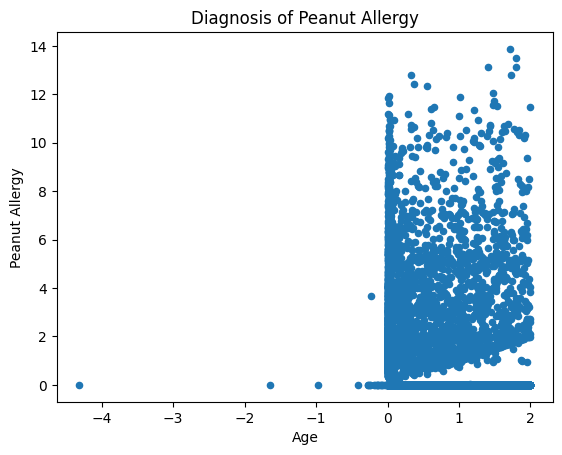

In [38]:
Plot=allergy.plot.scatter(x="AGESTARTYEARS", y="PEANUTALGSTART")
Plot.set_title("Diagnosis of Peanut Allergy")
Plot.set_xlabel("Age")
Plot.set_ylabel("Peanut Allergy")

In [39]:
allergy.PEANUTALGSTART.describe()

count    170240.000000
mean          0.091171
std           0.629037
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          13.875428
Name: PEANUTALGSTART, dtype: float64

#mean is 2.8 years old for diagnosis, standard deviation is 2.14. 5,576 children between 0-2 have a peanut allergy.

Text(0, 0.5, 'Sesame Allergy')

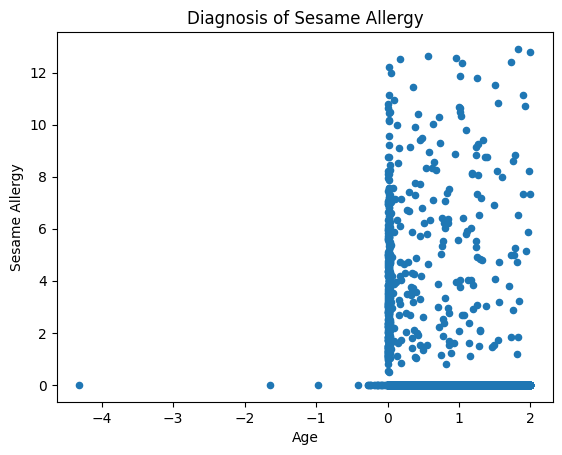

In [40]:
Plot=allergy.plot.scatter(x="AGESTARTYEARS", y="SESAMEALGSTART")
Plot.set_title("Diagnosis of Sesame Allergy")
Plot.set_xlabel("Age")
Plot.set_ylabel("Sesame Allergy")

In [41]:
allergy.SESAMEALGSTART.describe()

count    170240.000000
mean          0.013651
std           0.291422
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.906229
Name: SESAMEALGSTART, dtype: float64

#mean is 4.4 years old for diagnosis, standard deviation is 2.8. 524 children between 0-2 have a sesame allergy.

Creating a contingency table and run chi test, will start with gender factor and shellfish allergy.

In [ ]:
allergy_crosstab = pd.crosstab(allergy['GENDERFACTOR'],
                            allergy['SHELLFISHALGSTART'],
                           margins=True, margins_name="Total")

In [44]:
alpha = 0.05

In [46]:
chi_square = 0
rows = allergy['GENDERFACTOR'].unique()
columns = allergy['SHELLFISHALGSTART'].unique()
for i in columns:
    for j in rows:
        O = allergy_crosstab[i][j]
        E = allergy_crosstab[i]['Total'] * allergy_crosstab['Total'][j] / allergy_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [47]:
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1661.210902233995  and p value is: 0.5353902429778938
Failed to reject the null hypothesis.


#Now for gender factor and fish allergy

In [48]:
allergy_crosstab = pd.crosstab(allergy['GENDERFACTOR'],
                            allergy['FISHALGSTART'],
                           margins=True, margins_name="Total")

In [49]:
alpha = 0.05

In [50]:
chi_square = 0
rows = allergy['GENDERFACTOR'].unique()
columns = allergy['FISHALGSTART'].unique()
for i in columns:
    for j in rows:
        O = allergy_crosstab[i][j]
        E = allergy_crosstab[i]['Total'] * allergy_crosstab['Total'][j] / allergy_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [51]:
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 807.9450537369171  and p value is: 0.4444205489447812
Failed to reject the null hypothesis.


#Now for gender and milk.

In [52]:
allergy_crosstab = pd.crosstab(allergy['GENDERFACTOR'],
                            allergy['MILKALGSTART'],
                           margins=True, margins_name="Total")

In [53]:
alpha = 0.05

In [54]:
chi_square = 0
rows = allergy['GENDERFACTOR'].unique()
columns = allergy['MILKALGSTART'].unique()
for i in columns:
    for j in rows:
        O = allergy_crosstab[i][j]
        E = allergy_crosstab[i]['Total'] * allergy_crosstab['Total'][j] / allergy_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [55]:
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1744.3590826424022  and p value is: 0.15334176799750387
Failed to reject the null hypothesis.


#Now for gender and soy

In [56]:
allergy_crosstab = pd.crosstab(allergy['GENDERFACTOR'],
                            allergy['SOYALGSTART'],
                           margins=True, margins_name="Total")

In [57]:
alpha = 0.05

In [58]:
chi_square = 0
rows = allergy['GENDERFACTOR'].unique()
columns = allergy['SOYALGSTART'].unique()
for i in columns:
    for j in rows:
        O = allergy_crosstab[i][j]
        E = allergy_crosstab[i]['Total'] * allergy_crosstab['Total'][j] / allergy_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [59]:
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1073.1606670984763  and p value is: 0.4243377400157434
Failed to reject the null hypothesis.


Now for gender and egg

In [60]:
allergy_crosstab = pd.crosstab(allergy['GENDERFACTOR'],
                            allergy['EGGALGSTART'],
                           margins=True, margins_name="Total")

In [61]:
alpha = 0.05

In [62]:
chi_square = 0
rows = allergy['GENDERFACTOR'].unique()
columns = allergy['EGGALGSTART'].unique()
for i in columns:
    for j in rows:
        O = allergy_crosstab[i][j]
        E = allergy_crosstab[i]['Total'] * allergy_crosstab['Total'][j] / allergy_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [63]:
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1717.6525617133593  and p value is: 0.007593310712122547
Null Hypothesis is rejected.


now for gender and wheat

In [64]:
allergy_crosstab = pd.crosstab(allergy['GENDERFACTOR'],
                            allergy['WHEATALGSTART'],
                           margins=True, margins_name="Total")

In [65]:
alpha = 0.05

In [66]:
chi_square = 0
rows = allergy['GENDERFACTOR'].unique()
columns = allergy['WHEATALGSTART'].unique()
for i in columns:
    for j in rows:
        O = allergy_crosstab[i][j]
        E = allergy_crosstab[i]['Total'] * allergy_crosstab['Total'][j] / allergy_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [67]:
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 607.5247307509761  and p value is: 0.4520872933978165
Failed to reject the null hypothesis.


Now for gender and peanut

In [68]:
allergy_crosstab = pd.crosstab(allergy['GENDERFACTOR'],
                            allergy['PEANUTALGSTART'],
                           margins=True, margins_name="Total")

In [69]:
alpha = 0.05

In [70]:
chi_square = 0
rows = allergy['GENDERFACTOR'].unique()
columns = allergy['PEANUTALGSTART'].unique()
for i in columns:
    for j in rows:
        O = allergy_crosstab[i][j]
        E = allergy_crosstab[i]['Total'] * allergy_crosstab['Total'][j] / allergy_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [71]:
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 2180.940688777637  and p value is: 0.03152325402337475
Null Hypothesis is rejected.


now for gender and sesame

In [72]:
allergy_crosstab = pd.crosstab(allergy['GENDERFACTOR'],
                            allergy['SESAMEALGSTART'],
                           margins=True, margins_name="Total")

In [73]:
alpha = 0.05

In [74]:
chi_square = 0
rows = allergy['GENDERFACTOR'].unique()
columns = allergy['SESAMEALGSTART'].unique()
for i in columns:
    for j in rows:
        O = allergy_crosstab[i][j]
        E = allergy_crosstab[i]['Total'] * allergy_crosstab['Total'][j] / allergy_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [75]:
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 474.9064413123615  and p value is: 0.5055277704773649
Failed to reject the null hypothesis.


Now for ethnicity factor and shellfish.

In [84]:
allergy_crosstab = pd.crosstab(allergy['ETHNICITYFACTOR'],
                            allergy['SHELLFISHALGSTART'],
                           margins=True, margins_name="Total")

In [85]:
alpha = 0.05

In [86]:
chi_square = 0
rows = allergy['ETHNICITYFACTOR'].unique()
columns = allergy['SHELLFISHALGSTART'].unique()
for i in columns:
    for j in rows:
        O = allergy_crosstab[i][j]
        E = allergy_crosstab[i]['Total'] * allergy_crosstab['Total'][j] / allergy_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [87]:
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1057.2389649542013  and p value is: 1.0
Failed to reject the null hypothesis.


now for ethnicity and fish.

In [88]:
allergy_crosstab = pd.crosstab(allergy['ETHNICITYFACTOR'],
                            allergy['FISHALGSTART'],
                           margins=True, margins_name="Total")

In [89]:
alpha = 0.05

In [90]:
chi_square = 0
rows = allergy['ETHNICITYFACTOR'].unique()
columns = allergy['FISHALGSTART'].unique()
for i in columns:
    for j in rows:
        O = allergy_crosstab[i][j]
        E = allergy_crosstab[i]['Total'] * allergy_crosstab['Total'][j] / allergy_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [91]:
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 620.2703023094582  and p value is: 0.999999615952595
Failed to reject the null hypothesis.


now for ethnicity and milk

In [92]:
allergy_crosstab = pd.crosstab(allergy['ETHNICITYFACTOR'],
                            allergy['MILKALGSTART'],
                           margins=True, margins_name="Total")

In [93]:
alpha = 0.05

In [94]:
chi_square = 0
rows = allergy['ETHNICITYFACTOR'].unique()
columns = allergy['MILKALGSTART'].unique()
for i in columns:
    for j in rows:
        O = allergy_crosstab[i][j]
        E = allergy_crosstab[i]['Total'] * allergy_crosstab['Total'][j] / allergy_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [95]:
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1236.1757638292397  and p value is: 1.0
Failed to reject the null hypothesis.


ethnicity and soy:

In [96]:
allergy_crosstab = pd.crosstab(allergy['ETHNICITYFACTOR'],
                            allergy['SOYALGSTART'],
                           margins=True, margins_name="Total")

In [97]:
alpha = 0.05

In [98]:
chi_square = 0
rows = allergy['ETHNICITYFACTOR'].unique()
columns = allergy['SOYALGSTART'].unique()
for i in columns:
    for j in rows:
        O = allergy_crosstab[i][j]
        E = allergy_crosstab[i]['Total'] * allergy_crosstab['Total'][j] / allergy_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [99]:
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 828.3087724640297  and p value is: 0.9999999858912975
Failed to reject the null hypothesis.


ethnicity and egg:

In [100]:
allergy_crosstab = pd.crosstab(allergy['ETHNICITYFACTOR'],
                            allergy['EGGALGSTART'],
                           margins=True, margins_name="Total")

In [101]:
alpha = 0.05

In [102]:
chi_square = 0
rows = allergy['ETHNICITYFACTOR'].unique()
columns = allergy['EGGALGSTART'].unique()
for i in columns:
    for j in rows:
        O = allergy_crosstab[i][j]
        E = allergy_crosstab[i]['Total'] * allergy_crosstab['Total'][j] / allergy_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [103]:
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1251.269019621401  and p value is: 0.9999999998100432
Failed to reject the null hypothesis.


ethnicity and wheat:

In [104]:
allergy_crosstab = pd.crosstab(allergy['ETHNICITYFACTOR'],
                            allergy['WHEATALGSTART'],
                           margins=True, margins_name="Total")

In [105]:
alpha = 0.05

In [106]:
chi_square = 0
rows = allergy['ETHNICITYFACTOR'].unique()
columns = allergy['WHEATALGSTART'].unique()
for i in columns:
    for j in rows:
        O = allergy_crosstab[i][j]
        E = allergy_crosstab[i]['Total'] * allergy_crosstab['Total'][j] / allergy_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [107]:
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 462.3965793967701  and p value is: 0.9999951818784015
Failed to reject the null hypothesis.


ethnicity and peanut:

In [108]:
allergy_crosstab = pd.crosstab(allergy['ETHNICITYFACTOR'],
                            allergy['PEANUTALGSTART'],
                           margins=True, margins_name="Total")

In [109]:
alpha = 0.05

In [110]:
chi_square = 0
rows = allergy['ETHNICITYFACTOR'].unique()
columns = allergy['PEANUTALGSTART'].unique()
for i in columns:
    for j in rows:
        O = allergy_crosstab[i][j]
        E = allergy_crosstab[i]['Total'] * allergy_crosstab['Total'][j] / allergy_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [111]:
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1422.3068695686954  and p value is: 1.0
Failed to reject the null hypothesis.


ethnicity and sesame:

In [112]:
allergy_crosstab = pd.crosstab(allergy['ETHNICITYFACTOR'],
                            allergy['SESAMEALGSTART'],
                           margins=True, margins_name="Total")

In [113]:
alpha = 0.05

In [114]:
chi_square = 0
rows = allergy['ETHNICITYFACTOR'].unique()
columns = allergy['SESAMEALGSTART'].unique()
for i in columns:
    for j in rows:
        O = allergy_crosstab[i][j]
        E = allergy_crosstab[i]['Total'] * allergy_crosstab['Total'][j] / allergy_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [115]:
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 353.40978235927577  and p value is: 0.9999933414697108
Failed to reject the null hypothesis.
